<a href="https://colab.research.google.com/github/Natasha617/Practice_ML_DEV/blob/main/Project_case3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Мониторинг безопасности одиноких пожилых людей**

**ML задачи:**
* провести входной анализ данных (EDA)
* определить метрики для оценки эффективности модели
* сформировть baseline-модель
* предложить улучшенную модель и вывести ее в продакшн

# Библиотеки

In [1]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 40.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn import svm
import numpy as np
from sklearn.decomposition import PCA

In [3]:
drive.mount('/content/drive')

!cp "/content/drive/MyDrive/magamed/ML-сервисы/DB_elder_monitoring/data_ref_until_2020-02-13.csv" /content/data_ref_until_2020-02-13.csv
!cp "/content/drive/MyDrive/magamed/ML-сервисы/DB_elder_monitoring/database_gas.csv" /content/database_gas.csv
!cp "/content/drive/MyDrive/magamed/ML-сервисы/DB_elder_monitoring/database_pos.csv" /content/database_pos.csv

Mounted at /content/drive


# Данные

In [4]:
data_gas=pd.read_csv('database_gas.csv') #данные с датчиков температуры воздуха, газа, влажности, уровень CO2, CO и MOX.
data_gas

,timestamp,temperature,humidity,CO2CosIRValue,CO2MG811Value,MOX1,MOX2,MOX3,MOX4,COValue
0,2019-11-06 11:37:13.038174+01:00,19.48,54.86,128.0,563.0,476.0,731.0,649.0,565.0,128.0
1,2019-11-06 11:37:32.744996+01:00,19.59,54.23,129.0,563.0,477.0,731.0,649.0,565.0,125.0
2,2019-11-06 11:37:53.018087+01:00,19.63,54.05,128.0,566.0,478.0,732.0,649.0,565.0,125.0
3,2019-11-06 11:38:13.093151+01:00,19.64,53.74,128.0,566.0,478.0,732.0,649.0,565.0,125.0
4,2019-11-06 11:38:33.032832+01:00,19.67,53.53,128.0,569.0,480.0,732.0,650.0,565.0,125.0
...,...,...,...,...,...,...,...,...,...,...
416148,2020-02-13 11:56:53.929978+01:00,20.62,57.75,62.0,518.0,524.0,698.0,642.0,591.0,157.0
416149,2020-02-13 11:57:14.204458+01:00,20.62,57.75,62.0,518.0,524.0,698.0,641.0,591.0,157.0
416150,2020-02-13 11:57:33.983249+01:00,20.62,57.75,62.0,518.0,524.0,698.0,641.0,591.0,157.0
416151,2020-02-13 11:57:54.058349+01:00,20.62,57.74,63.0,518.0,524.0,698.0,641.0,591.0,157.0


In [5]:
data_gas.describe()

,temperature,humidity,CO2CosIRValue,CO2MG811Value,MOX1,MOX2,MOX3,MOX4,COValue
count,416153.000000,416153.000000,416153.000000,416153.000000,416153.000000,416153.000000,416153.000000,416153.000000,416153.000000
mean,20.115751,52.236446,102.459415,539.086523,500.289413,718.708761,672.788842,609.446752,120.124310
std,2.295836,4.343208,39.026812,34.934361,49.795030,31.296907,36.354293,42.703923,35.992508
min,13.530000,38.160000,21.000000,408.000000,262.000000,514.000000,447.000000,355.000000,74.000000
25%,18.640000,49.050000,76.000000,510.000000,468.000000,703.000000,655.000000,587.000000,103.000000
50%,20.100000,52.310000,105.000000,528.000000,502.000000,719.000000,674.000000,611.000000,113.000000
75%,21.630000,55.640000,117.000000,563.000000,536.000000,738.000000,693.000000,635.000000,128.000000
max,26.140000,69.260000,591.000000,632.000000,626.000000,808.000000,777.000000,727.000000,918.000000


In [6]:
data_pos=pd.read_csv('database_pos.csv') #Данные о позиции пожилого человека
data_pos

,datetime,Living room,Bedroom,Bathroom,Kitchen,Hallway
0,2019-11-01 02:52:55.271086300+00:00,NaN,0.0,NaN,NaN,NaN
1,2019-11-01 03:19:57.417067700+00:00,NaN,1.0,NaN,NaN,NaN
2,2019-11-01 03:21:53.257070700+00:00,NaN,0.0,NaN,NaN,NaN
3,2019-11-01 05:11:08.874031+00:00,NaN,1.0,NaN,NaN,NaN
4,2019-11-01 05:12:38.437033500+00:00,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...
28473,2020-02-13 17:04:38.956087800+00:00,1.0,NaN,NaN,NaN,NaN
28474,2020-02-13 17:05:29.384067600+00:00,NaN,NaN,1.0,NaN,NaN
28475,2020-02-13 17:06:21.575053600+00:00,0.0,NaN,NaN,NaN,NaN
28476,2020-02-13 17:06:30.519011100+00:00,NaN,NaN,0.0,NaN,NaN


# EDA

In [7]:
data_gas.dtypes.value_counts()

float64    9
object     1
dtype: int64

In [8]:
data_gas.select_dtypes(include=['float64','int64'])

,temperature,humidity,CO2CosIRValue,CO2MG811Value,MOX1,MOX2,MOX3,MOX4,COValue
0,19.48,54.86,128.0,563.0,476.0,731.0,649.0,565.0,128.0
1,19.59,54.23,129.0,563.0,477.0,731.0,649.0,565.0,125.0
2,19.63,54.05,128.0,566.0,478.0,732.0,649.0,565.0,125.0
3,19.64,53.74,128.0,566.0,478.0,732.0,649.0,565.0,125.0
4,19.67,53.53,128.0,569.0,480.0,732.0,650.0,565.0,125.0
...,...,...,...,...,...,...,...,...,...
416148,20.62,57.75,62.0,518.0,524.0,698.0,642.0,591.0,157.0
416149,20.62,57.75,62.0,518.0,524.0,698.0,641.0,591.0,157.0
416150,20.62,57.75,62.0,518.0,524.0,698.0,641.0,591.0,157.0
416151,20.62,57.74,63.0,518.0,524.0,698.0,641.0,591.0,157.0


In [9]:
data_gas.describe()

,temperature,humidity,CO2CosIRValue,CO2MG811Value,MOX1,MOX2,MOX3,MOX4,COValue
count,416153.000000,416153.000000,416153.000000,416153.000000,416153.000000,416153.000000,416153.000000,416153.000000,416153.000000
mean,20.115751,52.236446,102.459415,539.086523,500.289413,718.708761,672.788842,609.446752,120.124310
std,2.295836,4.343208,39.026812,34.934361,49.795030,31.296907,36.354293,42.703923,35.992508
min,13.530000,38.160000,21.000000,408.000000,262.000000,514.000000,447.000000,355.000000,74.000000
25%,18.640000,49.050000,76.000000,510.000000,468.000000,703.000000,655.000000,587.000000,103.000000
50%,20.100000,52.310000,105.000000,528.000000,502.000000,719.000000,674.000000,611.000000,113.000000
75%,21.630000,55.640000,117.000000,563.000000,536.000000,738.000000,693.000000,635.000000,128.000000
max,26.140000,69.260000,591.000000,632.000000,626.000000,808.000000,777.000000,727.000000,918.000000


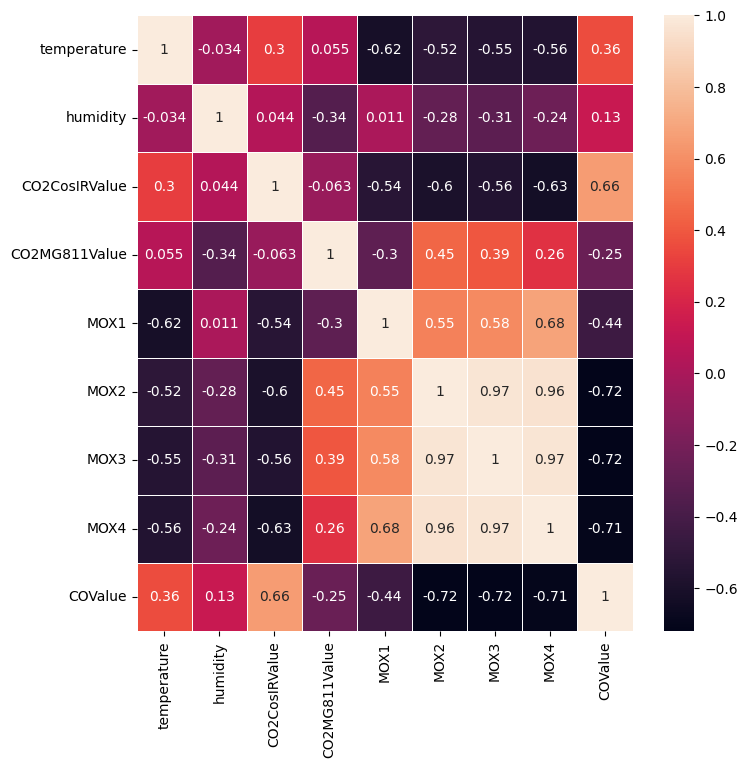

In [10]:
# Корреляция

corrmat = data_gas[['temperature', 'humidity', 'CO2CosIRValue', 'CO2MG811Value', 'MOX1', 'MOX2', 'MOX3', 'MOX4', 'COValue']].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corrmat, annot=True, linewidths=.5)
plt.show()

Тут можно сказать, что корелляция между MOX высокая

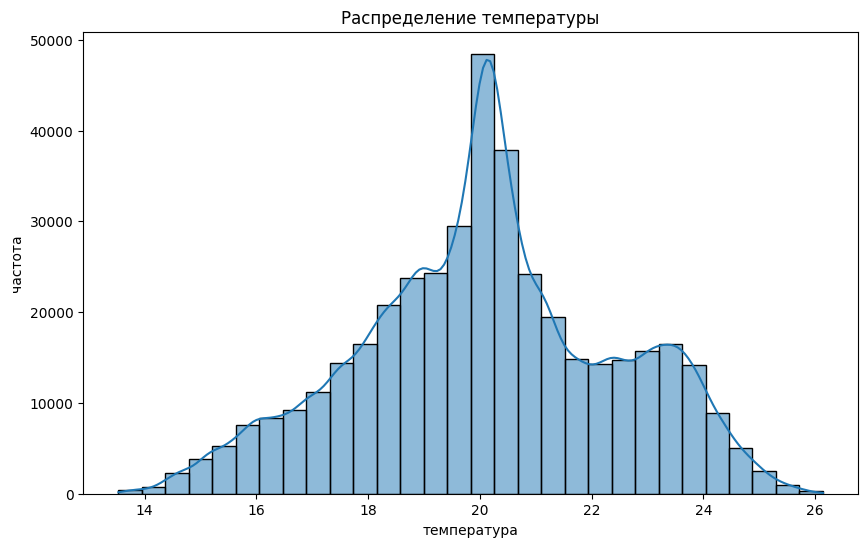

In [11]:
# temperature
plt.figure(figsize=(10, 6))
sns.histplot(data_gas['temperature'], bins=30, kde=True)
plt.title('Распределение температуры')
plt.xlabel('температура')
plt.ylabel('частота')
plt.show()

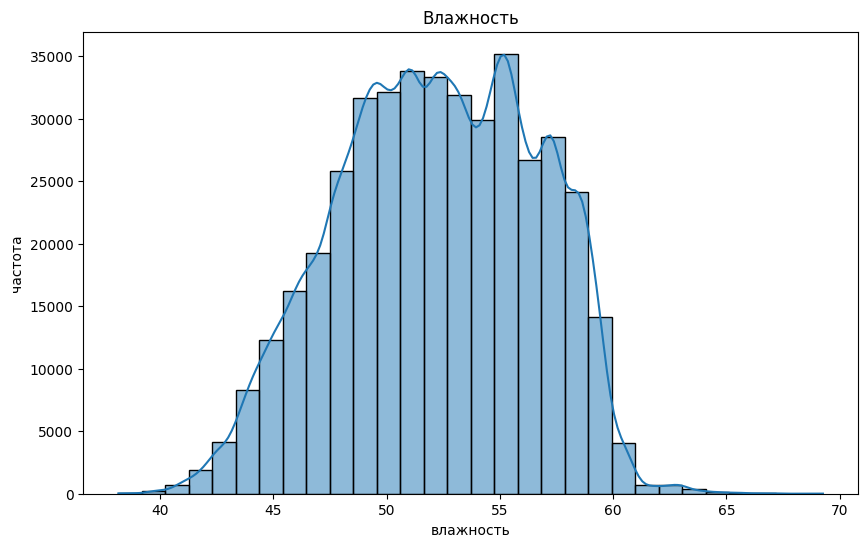

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data_gas['humidity'], bins=30, kde=True)
plt.title('Влажность')
plt.xlabel('влажность')
plt.ylabel('частота')
plt.show()

In [13]:
features = data_gas.columns.tolist()
features.remove('timestamp')     #features
features

['temperature',
 'humidity',
 'CO2CosIRValue',
 'CO2MG811Value',
 'MOX1',
 'MOX2',
 'MOX3',
 'MOX4',
 'COValue']

Распределение признаков по времени

In [14]:
data = data_gas.copy()

# Педобработка

In [15]:
#Дата, после которой идут эталонные данные

dt = "2020-01-25"

Тут удалим случайное посещение

In [16]:
data

,timestamp,temperature,humidity,CO2CosIRValue,CO2MG811Value,MOX1,MOX2,MOX3,MOX4,COValue
0,2019-11-06 11:37:13.038174+01:00,19.48,54.86,128.0,563.0,476.0,731.0,649.0,565.0,128.0
1,2019-11-06 11:37:32.744996+01:00,19.59,54.23,129.0,563.0,477.0,731.0,649.0,565.0,125.0
2,2019-11-06 11:37:53.018087+01:00,19.63,54.05,128.0,566.0,478.0,732.0,649.0,565.0,125.0
3,2019-11-06 11:38:13.093151+01:00,19.64,53.74,128.0,566.0,478.0,732.0,649.0,565.0,125.0
4,2019-11-06 11:38:33.032832+01:00,19.67,53.53,128.0,569.0,480.0,732.0,650.0,565.0,125.0
...,...,...,...,...,...,...,...,...,...,...
416148,2020-02-13 11:56:53.929978+01:00,20.62,57.75,62.0,518.0,524.0,698.0,642.0,591.0,157.0
416149,2020-02-13 11:57:14.204458+01:00,20.62,57.75,62.0,518.0,524.0,698.0,641.0,591.0,157.0
416150,2020-02-13 11:57:33.983249+01:00,20.62,57.75,62.0,518.0,524.0,698.0,641.0,591.0,157.0
416151,2020-02-13 11:57:54.058349+01:00,20.62,57.74,63.0,518.0,524.0,698.0,641.0,591.0,157.0


In [17]:

data.timestamp = data.timestamp.apply(lambda value: pd.to_datetime(value, utc=True))

data = data.groupby(pd.Grouper(key="timestamp", freq="10min")).agg("mean").reset_index()

In [18]:
#разметим данные
data['label'] = np.where(data.timestamp>=dt, 1, 0)

In [19]:
data

,timestamp,temperature,humidity,CO2CosIRValue,CO2MG811Value,MOX1,MOX2,MOX3,MOX4,COValue,label
0,2019-11-06 10:30:00+00:00,19.632222,53.832222,127.666667,567.444444,479.666667,732.222222,649.555556,565.111111,124.000000,0
1,2019-11-06 10:40:00+00:00,19.639667,53.970000,128.600000,579.800000,496.366667,731.500000,649.533333,565.433333,114.700000,0
2,2019-11-06 10:50:00+00:00,19.993333,49.446000,102.300000,600.033333,528.766667,760.166667,700.600000,611.666667,106.533333,0
3,2019-11-06 11:00:00+00:00,19.963333,47.408333,80.500000,615.033333,557.733333,781.266667,737.133333,656.900000,100.266667,0
4,2019-11-06 11:10:00+00:00,19.417667,48.102333,77.033333,619.633333,567.366667,787.433333,749.600000,676.933333,95.866667,0
...,...,...,...,...,...,...,...,...,...,...,...
14254,2020-02-13 10:10:00+00:00,20.654000,57.908667,43.033333,518.166667,525.833333,700.500000,643.800000,594.633333,156.633333,1
14255,2020-02-13 10:20:00+00:00,20.598333,58.131667,42.533333,518.000000,527.500000,701.133333,643.866667,594.300000,155.733333,1
14256,2020-02-13 10:30:00+00:00,20.590333,58.085667,42.833333,517.966667,526.100000,699.933333,642.800000,592.466667,155.600000,1
14257,2020-02-13 10:40:00+00:00,20.590000,57.969000,46.100000,517.633333,524.733333,699.000000,642.000000,591.533333,156.133333,1


In [20]:
data = data.dropna(axis=0)

# Обучение

## Logistic Regression

In [21]:
data

,timestamp,temperature,humidity,CO2CosIRValue,CO2MG811Value,MOX1,MOX2,MOX3,MOX4,COValue,label
0,2019-11-06 10:30:00+00:00,19.632222,53.832222,127.666667,567.444444,479.666667,732.222222,649.555556,565.111111,124.000000,0
1,2019-11-06 10:40:00+00:00,19.639667,53.970000,128.600000,579.800000,496.366667,731.500000,649.533333,565.433333,114.700000,0
2,2019-11-06 10:50:00+00:00,19.993333,49.446000,102.300000,600.033333,528.766667,760.166667,700.600000,611.666667,106.533333,0
3,2019-11-06 11:00:00+00:00,19.963333,47.408333,80.500000,615.033333,557.733333,781.266667,737.133333,656.900000,100.266667,0
4,2019-11-06 11:10:00+00:00,19.417667,48.102333,77.033333,619.633333,567.366667,787.433333,749.600000,676.933333,95.866667,0
...,...,...,...,...,...,...,...,...,...,...,...
14254,2020-02-13 10:10:00+00:00,20.654000,57.908667,43.033333,518.166667,525.833333,700.500000,643.800000,594.633333,156.633333,1
14255,2020-02-13 10:20:00+00:00,20.598333,58.131667,42.533333,518.000000,527.500000,701.133333,643.866667,594.300000,155.733333,1
14256,2020-02-13 10:30:00+00:00,20.590333,58.085667,42.833333,517.966667,526.100000,699.933333,642.800000,592.466667,155.600000,1
14257,2020-02-13 10:40:00+00:00,20.590000,57.969000,46.100000,517.633333,524.733333,699.000000,642.000000,591.533333,156.133333,1


In [22]:
X = data[features]
Y = data['label']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [24]:
x_train

,temperature,humidity,CO2CosIRValue,CO2MG811Value,MOX1,MOX2,MOX3,MOX4,COValue
9834,17.641000,48.859667,94.233333,510.600000,550.933333,707.800000,669.166667,604.300000,113.466667
756,20.483333,44.806333,97.033333,605.166667,501.533333,762.800000,723.333333,664.633333,106.100000
8955,19.257333,48.773333,96.666667,514.166667,508.766667,712.366667,674.133333,608.600000,118.266667
2688,21.028333,52.069667,122.900000,574.000000,424.566667,721.766667,678.700000,604.800000,113.333333
1090,19.437000,52.361000,117.533333,589.966667,468.066667,716.933333,675.233333,583.766667,112.133333
...,...,...,...,...,...,...,...,...,...
5280,18.782333,55.018333,105.900000,554.100000,505.633333,736.433333,684.333333,620.533333,102.000000
13788,20.136000,57.109333,45.433333,523.366667,555.800000,749.366667,698.500000,655.300000,96.000000
5479,19.134333,49.470667,60.833333,567.133333,574.166667,769.333333,732.800000,684.733333,84.700000
860,19.514000,45.826000,85.033333,610.300000,413.800000,754.033333,712.433333,634.266667,96.066667


In [25]:
%%time
clf_log = LogisticRegression().fit(x_train, y_train)

CPU times: user 183 ms, sys: 287 ms, total: 471 ms
Wall time: 392 ms


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
f1_score(y_test, clf_log.predict(x_test),average='weighted')

0.9874367062865032

## DecisionTreeClassifier

In [27]:
clf = tree.DecisionTreeClassifier().fit(x_train, y_train)

In [28]:
f1_score(y_test, clf.predict(x_test),average='weighted')

0.9949562728433805

##RandomForestClassifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rand = RandomForestClassifier().fit(x_train,y_train)

In [31]:
f1_score(y_test, rand.predict(x_test),average='weighted')

0.9981964409878062

В качестве бейзлайна была логистическая регрессия

А лучшая модель - Случайный лес

#Сохранение моделей

In [32]:
import joblib
joblib.dump(clf_log,"log_reg.pkl")
joblib.dump(clf,"d_tree.pkl")
joblib.dump(rand,"rand_forest.pkl")

['rand_forest.pkl']

In [33]:
import joblib
joblib.dump(rand,'rand_forest.joblib')

['rand_forest.joblib']

In [34]:
!pip install cloudpickle

In [35]:
import cloudpickle
with open('rand_forest.pkl', 'wb') as model_file:
    cloudpickle.dump(rand, model_file)

In [36]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00


In [37]:
from sklearn.metrics import accuracy_score

In [38]:
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=100,  # Количество деревьев
                                    depth=6,        # Глубина дерева
                                    learning_rate=0.1,  # Скорость обучения
                                    loss_function='MultiClass',  # Функция потерь для задачи классификации
                                    random_seed=42,  # Фиксация случайного сида для воспроизводимости
                                    verbose=10)  # Отображение логов
catboost_model.fit(x_train, y_train, eval_set=(x_test, y_test))

# Предсказание на тестовом наборе
y_pred = catboost_model.predict(x_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

0:	learn: 0.6064256	test: 0.6051020	best: 0.6051020 (0)	total: 84ms	remaining: 8.32s
10:	learn: 0.2160324	test: 0.2107478	best: 0.2107478 (10)	total: 367ms	remaining: 2.97s
20:	learn: 0.0976804	test: 0.0930921	best: 0.0930921 (20)	total: 602ms	remaining: 2.27s
30:	learn: 0.0541213	test: 0.0500012	best: 0.0500012 (30)	total: 744ms	remaining: 1.66s
40:	learn: 0.0353830	test: 0.0322664	best: 0.0322664 (40)	total: 838ms	remaining: 1.21s
50:	learn: 0.0268879	test: 0.0246034	best: 0.0246034 (50)	total: 925ms	remaining: 888ms
60:	learn: 0.0210197	test: 0.0194684	best: 0.0194684 (60)	total: 1.01s	remaining: 646ms
70:	learn: 0.0174666	test: 0.0164685	best: 0.0164685 (70)	total: 1.1s	remaining: 451ms
80:	learn: 0.0147390	test: 0.0142126	best: 0.0142126 (80)	total: 1.23s	remaining: 288ms
90:	learn: 0.0126631	test: 0.0125988	best: 0.0125988 (90)	total: 1.49s	remaining: 147ms
99:	learn: 0.0110492	test: 0.0113501	best: 0.0113501 (99)	total: 1.65s	remaining: 0us

bestTest = 0.01135011324
bestIteratio

In [39]:
catboost_model.save_model('model_catboost',
                          format = 'cbm',
                          export_parameters = None,
                          pool = None)